# Playing with the data :)

In [9]:
!pip install scipy.io
!pip install scipy
!pip install matplotlib


ERROR: Could not find a version that satisfies the requirement scipy.io (from versions: none)
ERROR: No matching distribution found for scipy.io


In [10]:
!pip install numpy

In [12]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
data = loadmat('Xtrain.mat')
Xtrain = data['Xtrain']



In [13]:
data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Xtrain'])

In [14]:
import numpy as np
def normalize_array(arr):
    norm_arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    return norm_arr
Xtrain = normalize_array(Xtrain)
Xtrain = Xtrain.ravel()
print(Xtrain)


[0.33201581 0.54940711 0.36758893 0.1541502  0.07905138 0.07509881
 0.11857708 0.27667984 0.53754941 0.43083004 0.18181818 0.08300395
 0.06719368 0.09881423 0.22529644 0.50197628 0.50197628 0.22134387
 0.09881423 0.06719368 0.08695652 0.17391304 0.43478261 0.56126482
 0.28063241 0.11067194 0.07114625 0.06719368 0.13833992 0.35573123
 0.59288538 0.35968379 0.13438735 0.07114625 0.06324111 0.10671937
 0.27272727 0.56916996 0.45454545 0.17391304 0.08300395 0.06324111
 0.07905138 0.19762846 0.49802372 0.55335968 0.23715415 0.09486166
 0.05928854 0.06719368 0.13833992 0.38735178 0.61660079 0.33201581
 0.11857708 0.05928854 0.05928854 0.09881423 0.27667984 0.60079051
 0.45849802 0.16205534 0.07114625 0.0513834  0.07509881 0.17786561
 0.49802372 0.58498024 0.24110672 0.08695652 0.05533597 0.05928854
 0.12252964 0.35573123 0.64822134 0.36758893 0.12252964 0.05533597
 0.04743083 0.07905138 0.22134387 0.58102767 0.53359684 0.18972332
 0.07114625 0.0513834  0.05533597 0.13043478 0.41106719 0.6600

In [15]:
print(np.mean(Xtrain, axis=0))  # Mean of each column (if it's a 2D matrix)
print(np.std(Xtrain, axis=0))   # Standard deviation of each column


0.22883003952569173
0.1851857226641462


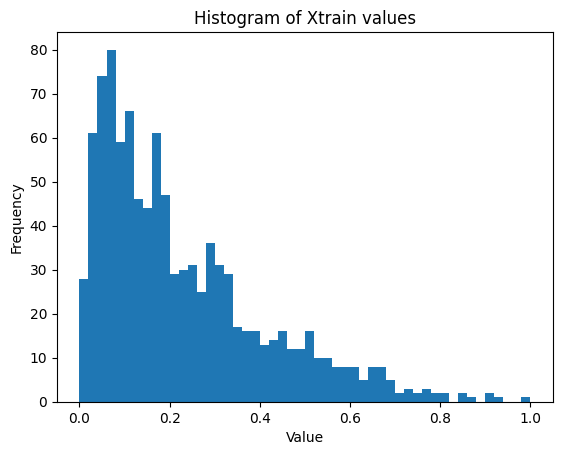

In [16]:
plt.hist(Xtrain.flatten(), bins=50)
plt.title("Histogram of Xtrain values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [17]:
mean_value = np.mean(Xtrain)
std_dev = np.std(Xtrain)
min_value = np.min(Xtrain)
max_value = np.max(Xtrain)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")


Mean: 0.22883003952569173
Standard Deviation: 0.1851857226641462
Min Value: 0.0
Max Value: 1.0


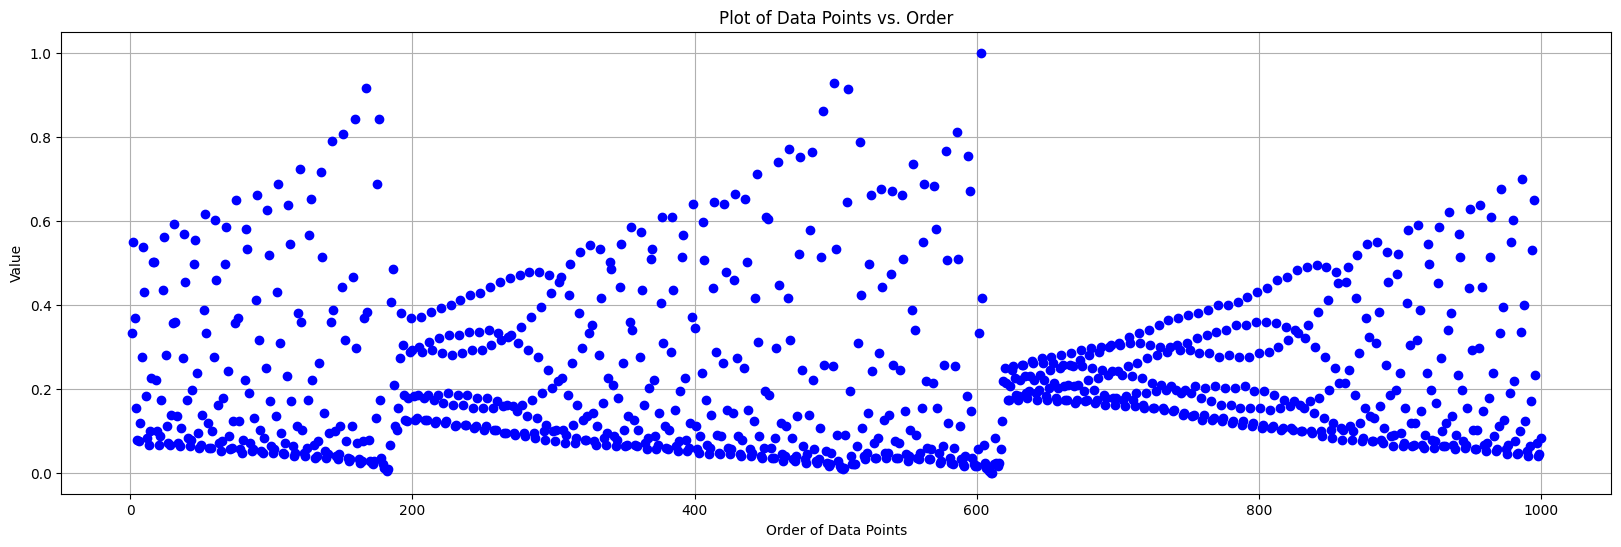

In [18]:

x_values = np.arange(1, len(Xtrain) + 1)


plt.figure(figsize=(20, 6))
plt.plot(x_values, Xtrain, marker='o', color='b', linestyle='None', label='Data points')
plt.xlabel('Order of Data Points')
plt.ylabel('Value')
plt.title('Plot of Data Points vs. Order')
plt.grid(True)
plt.show()


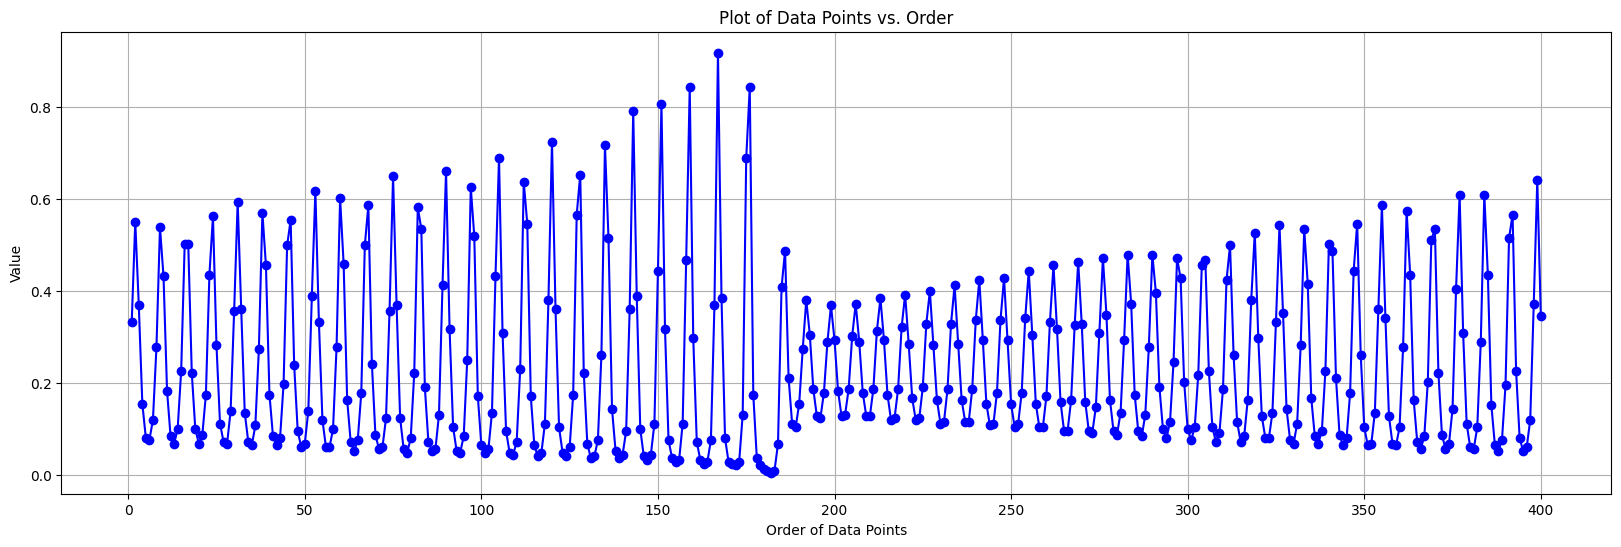

In [19]:

x_values = np.arange(1, len(Xtrain) + 1)
x_subset = x_values[:400]
y_subset = Xtrain[:400]

plt.figure(figsize=(20, 6))
plt.plot(x_subset, y_subset, marker='o', color='b', linestyle='-', label='Data points')
plt.xlabel('Order of Data Points')
plt.ylabel('Value')
plt.title('Plot of Data Points vs. Order')
plt.grid(True)
plt.show()


In [20]:
!pip install tensorflow

In [21]:
import tensorflow as tf


In [22]:
print(Xtrain.shape)


(1000,)


In [23]:
window = 10

X_window = []
y_window = []

for i in range(len(Xtrain) - window):
    X_window.append(Xtrain[i:i+window])
    y_window.append(Xtrain[i+window])

X_win = np.array(X_window)
y_win = np.array(y_window)

X_win = X_win.reshape((X_win.shape[0], window, 1))
y_win = y_win.reshape((-1, 1))


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

#dense - every input neuron is connected to every output neuron.
#simpleRNNN - every input neuron is connected to every output neuron.


model = Sequential([
    SimpleRNN(32, input_shape=(window, 1)),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_win, y_win, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0665 - mae: 0.1873 - mse: 0.0665 - val_loss: 0.0067 - val_mae: 0.0724 - val_mse: 0.0067
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0090 - mae: 0.0627 - mse: 0.0090 - val_loss: 0.0042 - val_mae: 0.0491 - val_mse: 0.0042
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0079 - mae: 0.0543 - mse: 0.0079 - val_loss: 0.0039 - val_mae: 0.0488 - val_mse: 0.0039
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0084 - mae: 0.0525 - mse: 0.0084 - val_loss: 0.0026 - val_mae: 0.0399 - val_mse: 0.0026
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068 - mae: 0.0488 - mse: 0.0068 - val_loss: 0.0035 - val_mae: 0.0439 - val_mse: 0.0035
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mae: 0.0528 - mse: 0.0084 - val_loss: 0.0025 - val_mae: 0.0385 - val_mse: 0.0025
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mae: 0.0521 - mse: 0.0074 - val_loss: 0.

In [26]:
loss, mae, mse = model.evaluate(X_win, y_win)
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - mae: 0.0495 - mse: 0.0058
MAE: 0.0480, MSE: 0.0057


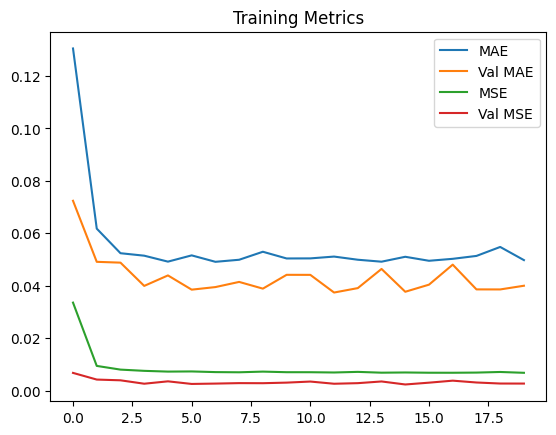

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.plot(history.history['mse'], label='MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.legend()
plt.title("Training Metrics")
plt.show()


# Function for diff params

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib.ticker import MultipleLocator



In [115]:
def build_lstm_model(
    input_shape,              # (lookback, 1)
    num_layers,             # Number of LSTM layers
    units_per_layer,       # Units in each LSTM layer
    dropout_rate,
    l2_reg
):
    model = Sequential()

    for i in range(num_layers):
        return_sequences = (i < num_layers - 1)

        if i == 0:
            model.add(LSTM(units_per_layer, return_sequences=return_sequences, input_shape=input_shape))
        else:
            model.add(LSTM(units_per_layer, return_sequences=return_sequences))

        model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    return model


#Splitting the data


In [92]:
def prepare_data_simple(Xtrain, lookback):
    Xtrain = Xtrain.flatten()  # Flatten data to 1D if it's not already

    # Calculate the actual size of training and validation data
    total_samples = len(Xtrain)
    split_idx = int(total_samples * 0.8)  # 80% training, 20% validation

    # Take into account the lookback, so we ensure enough data points for both training and validation
    train_data = Xtrain[:split_idx]
    val_data = Xtrain[split_idx:]  # No need for overlap here as long as you have enough samples for both sets

    # Create sequences of lookback data
    def create(X):
        Xs, ys = [], []
        for i in range(lookback, len(X)):  # Start from `lookback` so we have enough data to form the first input
            Xs.append(X[i - lookback:i])  # Lookback sequence
            ys.append(X[i])  # Predict the next value
        return np.array(Xs), np.array(ys)

    # Create the training and validation data
    X_train, y_train = create(train_data)
    X_val, y_val = create(val_data)

    # Reshape for LSTM/RNN input: (samples, timesteps, features)
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]

    return X_train, y_train, X_val, y_val


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - loss: 0.0576 - val_loss: 0.0414
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - loss: 0.0403 - val_loss: 0.0366
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - loss: 0.0350 - val_loss: 0.0359
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 0.0341 - val_loss: 0.0342
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 0.0352 - val_loss: 0.0334
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 0.0326 - val_loss: 0.0297
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - loss: 0.0303 - val_loss: 0.0253
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.0261 - val_loss: 0.0199
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - loss: 0.0223 - val_loss: 0.0099
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 0.0193 - val_loss: 0.0083
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0187 - val_loss: 0.0080
Epoch 12/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step

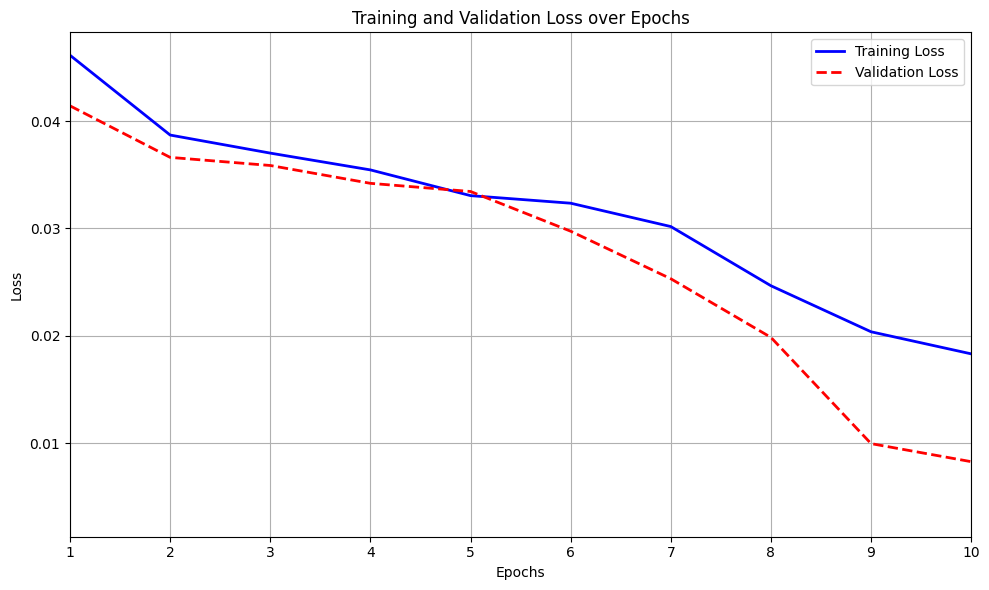

In [128]:
X_train, y_train, X_val, y_val = prepare_data_simple(Xtrain, lookback=50)

model = build_lstm_model(input_shape=(X_train.shape[1], 1), num_layers=2, units_per_layer=128, dropout_rate=0.3, l2_reg=0.001)

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(X_val, y_val),
                    verbose=1)

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Set the x-axis limits (optional, if you want it between 1 and 10)
plt.xlim(1, 10)


plt.grid(True)
plt.tight_layout()
plt.show()


# COMPARISON- lstm - vanilla rnn - linear regression

In [63]:
X_train, y_train, X_val, y_val = prepare_data_simple(Xtrain, lookback=10)


In [79]:
lstm_model = build_lstm_model(
    input_shape=(X_train.shape[1], 1),
    num_layers=1,
    units_per_layer=64)
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
lstm_pred = lstm_model.predict(X_val)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [80]:
def build_rnn_model(input_shape, units=64):
    model = Sequential([
        SimpleRNN(units, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

rnn_model = build_rnn_model(input_shape=(X_train.shape[1], 1))
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
rnn_pred = rnn_model.predict(X_val)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [81]:
from sklearn.linear_model import LinearRegression

X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_val_lr = X_val.reshape(X_val.shape[0], -1)

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train)
lr_pred = lr_model.predict(X_val_lr)


In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}")

evaluate_model("LSTM", y_val, lstm_pred)
evaluate_model("Vanilla RNN", y_val, rnn_pred)
evaluate_model("Linear Regression", y_val, lr_pred)


LSTM - MSE: 0.0057, MAE: 0.0556
Vanilla RNN - MSE: 0.0036, MAE: 0.0456
Linear Regression - MSE: 0.0031, MAE: 0.0413


# Vanilla RNN

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

def build_rnn_model(
    input_shape,              # (lookback, 1)
    num_layers=1,             # Number of RNN layers
    units_per_layer=64,       # Units in each RNN layer
    dropout_rate=0.2
):
    model = Sequential()

    for i in range(num_layers):
        return_sequences = (i < num_layers - 1)

        if i == 0:
            model.add(SimpleRNN(units_per_layer, return_sequences=return_sequences, input_shape=input_shape))
        else:
            model.add(SimpleRNN(units_per_layer, return_sequences=return_sequences))

        model.add(Dropout(dropout_rate))

    model.add(Dense(1))  # Output layer for 1-step prediction
    model.compile(optimizer='adam', loss='mse')

    return model


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.5852 - val_loss: 0.0915
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.3346 - val_loss: 0.0150
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2906 - val_loss: 0.0063
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2130 - val_loss: 0.0654
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1876 - val_loss: 0.0727
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1803 - val_loss: 0.0245
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1392 - val_loss: 0.0181
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1240 - val_loss: 0.0063
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1015 - val_loss: 0.0079
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0904 - val_loss: 0.0027


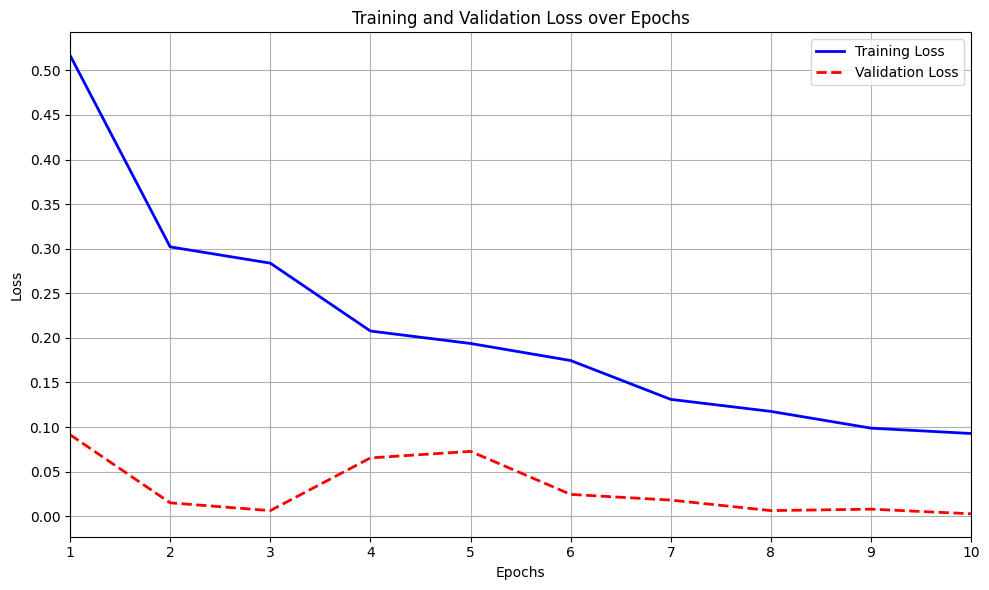

In [120]:

# Set y-axis tick interval
X_train, y_train, X_val, y_val = prepare_data_simple(Xtrain, lookback=20)

rnn_model = build_rnn_model(
    input_shape=(X_train.shape[1], 1),
    num_layers=4,
    units_per_layer=64,
    dropout_rate=0.2  # For a baseline, you might set this to 0
)
history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Set the x-axis limits (optional, if you want it between 1 and 10)
plt.xlim(1, 10)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))


plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.2862 - val_loss: 0.0353
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1076 - val_loss: 0.0278
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1101 - val_loss: 0.0286
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0735 - val_loss: 0.0168
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0610 - val_loss: 0.0052
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0506 - val_loss: 0.0033
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0375 - val_loss: 0.0043
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0367 - val_loss: 0.0037
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0255 - val_loss: 0.0025
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0272 - val_loss: 0.0031


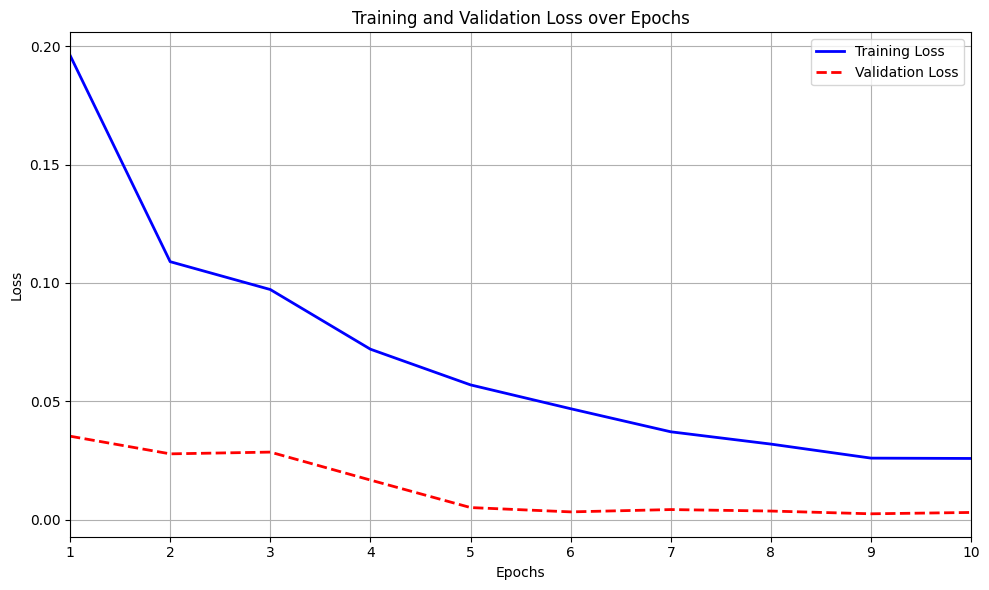

In [123]:
X_train, y_train, X_val, y_val = prepare_data_simple(Xtrain, lookback=20)

rnn_model = build_rnn_model(
    input_shape=(X_train.shape[1], 1),
    num_layers=3,
    units_per_layer=64,
    dropout_rate=0.1
)
history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Set the x-axis limits (optional, if you want it between 1 and 10)
plt.xlim(1, 10)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))

plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 0.4652 - val_loss: 0.0604
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.2980 - val_loss: 0.0392
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2233 - val_loss: 0.0233
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.2017 - val_loss: 0.0294
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1657 - val_loss: 0.0037
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1324 - val_loss: 0.0114
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1259 - val_loss: 0.0039
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1155 - val_loss: 0.0252
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0925 - val_loss: 0.0149
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0753 - val_loss: 0.0040


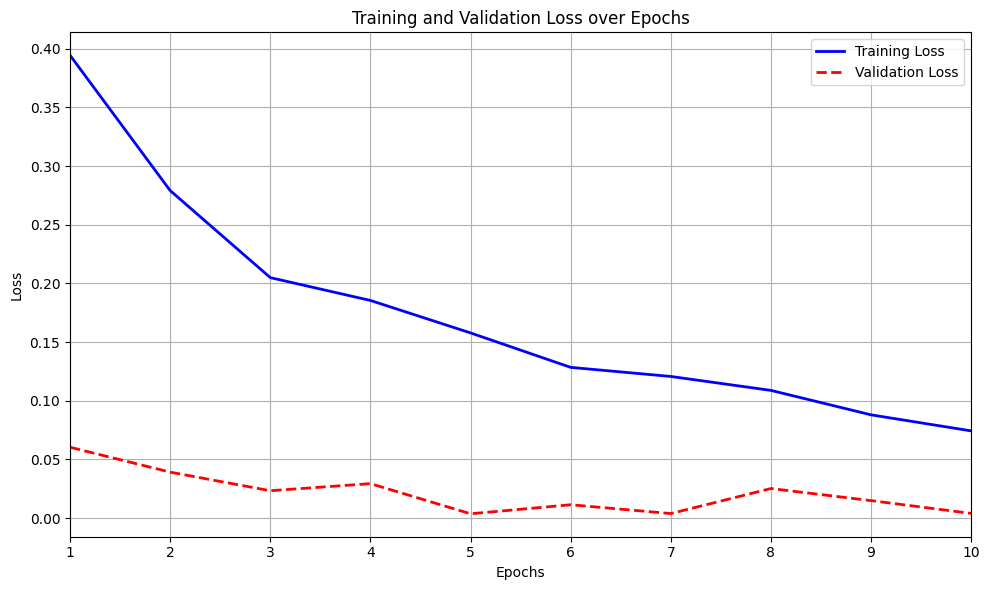

In [124]:
X_train, y_train, X_val, y_val = prepare_data_simple(Xtrain, lookback=30)

rnn_model = build_rnn_model(
    input_shape=(X_train.shape[1], 1),
    num_layers=4,
    units_per_layer=64,
    dropout_rate=0.2  # For a baseline, you might set this to 0
)
history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss', color='blue', linewidth=2)
plt.plot(epochs, val_loss, label='Validation Loss', color='red', linestyle='--', linewidth=2)
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Set the x-axis limits (optional, if you want it between 1 and 10)
plt.xlim(1, 10)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))

# Set y-axis tick interval


plt.grid(True)
plt.tight_layout()
plt.show()